In [6]:
import os
statinfo = os.stat('Untitled.ipynb')
statinfo

size_bytes = statinfo.st_size
print( float(size_bytes)/1048576 )

0.23292350769


In [13]:
import json
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


JSON_FP = "/home/alexn/github_repos/DZD/dnd-5e-srd/json/"
JSON_FP = "/Users/newberry/code/git_projects/DZD/dnd-5e-srd/json/"
! ls $JSON_FP

00 legal.json        06 mechanics.json    12 conditions.json
01 races.json        07 combat.json       13 gods.json
02 classes.json      08 spellcasting.json 14 planes.json
03 beyond1st.json    09 running.json      15 creatures.json
04 equipment.json    10 magic items.json  16 npcs.json
05 feats.json        11 monsters.json


In [14]:
def load_json( fp ):
    with open(fp, "r") as f:
        return json.load(f)
    
def plot_monster_image( monster_name ):
    img = get_monster_image( monster_name )

    fig = plt.figure()
    plt.imshow(img)
    fig.suptitle( monster_name, fontsize=20)
    plt.xticks([], [])
    plt.yticks([], [])
#     pylab.rcParams.update(params)
    plt.show()
    
def get_monster_image( monster_name ):
    url = monster_image_json[monster_name]['img_url']
    img = get_url_img( url )
    return img
    
def get_url_img( url ):
    from PIL import Image
    import requests
    from io import BytesIO

    response = requests.get(url)
    return Image.open(BytesIO(response.content))

# Monster Image file (20)

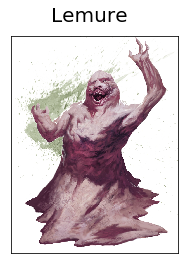

In [74]:

mon_i = 4
monster_name ='Lemure'

plot_monster_image( monster_name )
# fig.savefig('test.jpg')

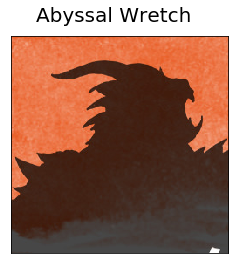

In [6]:
monster_image_json = load_json( JSON_FP+"20 monster images.json" )
monster_image_json_keys = list( monster_image_json.keys() )

mon_i = 4
monster_name = monster_image_json_keys[mon_i]

plot_monster_image( monster_name )
# fig.savefig('test.jpg')

# Monster Info file (11)

In [83]:
monster_json = load_json( JSON_FP+"11 monsters.json" )

valid_letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','R','S','T','U','V','W','X','Z']
monster_dict = {}
for letter in valid_letters:
    monster_list = monster_json['Monsters']['Monsters ('+letter+')']
    monster_dict[letter] = monster_list

monst_groups = set()
monster_dict_2 = {}
for letter in monster_dict.keys():
    for monst_title in monster_dict[letter]:
        for monst_title_key in monster_dict[letter][monst_title].keys():
            # If this monster is a single monster and not a group
            if monst_title_key == 'content':
                monster_dict_2[monst_title] = monster_dict[letter][monst_title][monst_title_key]
            # If `monst_title_key` is a monster group
            else:
                monst_groups.add(monst_title)
                for monst_subname in monster_dict[letter][monst_title][monst_title_key].keys():
                    monster_dict_2[monst_subname] = \
                    monster_dict[letter][monst_title][monst_title_key][monst_subname]['content']

TypeError: list indices must be integers, not str

In [84]:
monster_dict[letter][monst_title][monst_title_key][monst_subname]

[u'*Medium construct, unaligned*',
 u'**Armor Class** 18 (natural armor)',
 u'**Hit Points** 33 (6d8 + 6)',
 u'**Speed** 25 ft.',
 {u'table': {u'CHA': [u'1 (\u22125)'],
   u'CON': [u'13 (+1)'],
   u'DEX': [u'11 (+0)'],
   u'INT': [u'1 (\u22125)'],
   u'STR': [u'14 (+2)'],
   u'WIS': [u'3 (\u22124)']}},
 u'**Damage Immunities** poison, psychic',
 u'**Condition Immunities** blinded, charmed, deafened, exhaustion, frightened, paralyzed, petrified, poisoned',
 u'**Senses** blindsight 60 ft. (blind beyond this radius), passive Perception 6',
 u'**Languages** \u2014',
 u'**Challenge** 1 (200 XP)',
 u'***Antimagic Susceptibility.*** The armor is incapacitated while in the area of an *antimagic field.* If targeted by *dispel magic*, the armor must succeed on a',
 u'Constitution saving throw against the caster\u2019s spell save DC or fall unconscious for 1 minute.',
 u'***False Appearance.*** While the armor remains motionless, it is indistinguishable from a normal suit of armor.',
 u'**Actions

In [75]:
for field in monster_json['Monsters'].keys():
    if 'Monsters' in field:
        for monst_name in monster_json['Monsters'][field].keys():
            if monst_name[len(monst_name)-1]=='s' or 'Dragons' in monst_name or 'Fungi' in monst_name:
                print('__________________________________________')
            print( monst_name )

Rakshasa
Rust Monster
Roc
Remorhaz
Roper
Troll
Treant
Tarrasque
Nightmare
__________________________________________
Nagas
__________________________________________
Pegasus
Purple Worm
Pseudodragon
Xorn
Invisible Stalker
Lich
Lamia
__________________________________________
Lycanthropes
Lizardfolk
__________________________________________
Zombies
Ettercap
__________________________________________
Elementals
Elf, Drow
Ettin
Gargoyle
__________________________________________
Genies
Gnoll
__________________________________________
Ghouls
Grimlock
Gorgon
__________________________________________
Giants
Ghost
Gibbering Mouther
__________________________________________
Golems
Griffon
Goblin
Grick
Gnome, Deep (Svirfneblin)
Cloaker
Chuul
Centaur
Couatl
Chimera
Cockatrice
__________________________________________
Vampires
__________________________________________
Animated Objects
__________________________________________
Angels
Aboleth
Shambling Mound
Sprite
Shield Guardian
Salamander


In [93]:
with open('monster_dict_1.json','w') as f:
    json.dump( monster_dict, f, indent=4, sort_keys=True )

In [87]:
with open('monster_dict_1.json','r') as f:
    monster_dict = json.load( f )

In [81]:
for monst_name in monster_dict.keys():
    print( monst_name )

Invisible Stalker
Adult Silver Dragon
Young Green Dragon
Gnoll
Hydra
Cockatrice
Will-o’-Wisp
Elf, Drow
Young Copper Dragon
Aboleth
Blue Dragon Wyrmling
Rakshasa
Adult Bronze Dragon
Pegasus
Pseudodragon
Basilisk
Manticore
Xorn
Adult White Dragon
Roper
Otyugh
Bronze Dragon Wyrmling
Bugbear
Copper Dragon Wyrmling
Young White Dragon
Kraken
Magmin
Ettin
Merrow
Ancient Copper Dragon
Purple Worm
Couatl
Adult Black Dragon
Medusa
Specter
Wraith
Lamia
Nightmare
Bulette
Cloaker
Adult Copper Dragon
Half-Dragon Template
Red Dragon Wyrmling
Merfolk
Ancient Green Dragon
Young Blue Dragon
Black Dragon Wyrmling
Centaur
Gold Dragon Wyrmling
content
White Dragon Wyrmling
Adult Gold Dragon
Adult Blue Dragon
Orc
Adult Brass Dragon
Grimlock
Gorgon
Lizardfolk
Ancient Black Dragon
Silver Dragon Wyrmling
Adult Green Dragon
Ancient Gold Dragon
Young Bronze Dragon
Gargoyle
Ettercap
Ogre
Roc
Young Gold Dragon
Tarrasque
Owlbear
Young Red Dragon
Hobgoblin
Ancient Bronze Dragon
Satyr
Ancient Blue Dragon
Succubus/Inc

In [103]:
for monst_name in monster_dict.keys():
    
    print( monster_dict[monst_name][1] )

**Armor Class** 14
**Armor Class** 19 (natural armor)
**Armor Class** 18 (natural armor)
**Armor Class** 15 (hide armor, shield)
**Armor Class** 15 (natural armor)
**Armor Class** 11
**Armor Class** 19
**Armor Class** 15 (chain shirt)
**Armor Class** 17 (natural armor)
**Armor Class** 17 (natural armor)
**Armor Class** 17 (natural armor)
**Armor Class** 16 (natural armor)
**Armor Class** 19 (natural armor)
**Armor Class** 12
**Armor Class** 13 (natural armor)
**Armor Class** 15 (natural armor)
**Armor Class** 14 (natural armor)
**Armor Class** 19 (natural armor)
**Armor Class** 18 (natural armor)
**Armor Class** 20 (natural armor)
**Armor Class** 14 (natural armor)
**Armor Class** 17 (natural armor)
**Armor Class** 16 (hide armor, shield)
**Armor Class** 16 (natural armor)
**Armor Class** 17 (natural armor)
**Armor Class** 18 (natural armor)
**Armor Class** 14 (natural armor)
**Armor Class** 12 (natural armor)
**Armor Class** 13 (natural armor)
**Armor Class** 21 (natural armor)
**Armo

In [102]:
for monst_name in monster_dict.keys():
    
    # Element 0
    e_0 = monster_dict[monst_name][0]
    e_0 = e_0.replace('*','').replace(',','').replace('(','').replace(')','').split(' ')
    size = e_0[0][0].lower() # Medium -> 'm'
    monster_type = e_0[1]
    if len(e_0) == 5:
        alignment_cng = e_0[3][0]
        alignment_enl = e_0[4][0]
    elif len(e_0) == 4:
        alignment_cng = e_0[2][0]
        alignment_enl = e_0[3][0]
    elif len(e_0) == 3:
        alignment_cng = e_0[2][0]
        alignment_enl = e_0[2][0]
    compound_alignment = alignment_cng+alignment_enl
    # size, monster_type, compound_alignment
    
    # Element 1
    e_1 = monster_dict[monst_name][1]
    e_1 = e_1.replace('**Armor Class** ','')
    if 'natural armor' in e_1: # natural armor
        
    elif '(' in e_1: # has armor
        

In [101]:
e_0

[u'Medium', u'elemental', u'neutral']